In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
! pip install prophet 

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/c7/ef/925617d36c08e0bbdf4347a9b38974ce7ab8fdb5d1a5cf0e3f3c65ea43da/prophet-1.1.7-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/e6/b0/de2bdc19367109936d8f321068723d473c825ab53bd7490779b6ad519989/holidays-0.76-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.4 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.4 kB ? eta -:--:--
     ---------

In [6]:
X_train.columns

Index(['energy_delivered_kwh', 'battery_capacity_kwh', 'vehicle_age_years',
       'battery_health_index', 'charger_power_kw', 'initial_soc_percent',
       'final_soc_percent', 'soc_gained_percent', 'ambient_temperature_c',
       'humidity_percent', 'air_quality_index', 'battery_temperature_c',
       'grid_frequency_hz', 'grid_reliability_index', 'power_quality_score',
       'load_shedding_event', 'grid_load_mw', 'total_cost_inr',
       'station_congestion_level', 'queue_wait_time_min',
       'charger_utilization_rate', 'station_uptime_percent',
       'charging_efficiency_percent', 'charging_curve_efficiency',
       'cooling_system_active', 'thermal_management', 'start_time_year',
       'start_time_month', 'start_time_day', 'start_time_hour',
       'start_time_min', 'start_time_sec', 'end_time_year', 'end_time_month',
       'end_time_day', 'end_time_hour', 'end_time_min', 'end_time_sec',
       'charger_type_AC_SLOW', 'charger_type_DC_FAST',
       'plug_type_Bharat DC001', 

In [7]:
y_train.columns

Index(['charging_duration_min'], dtype='object')

In [10]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [11]:
# Create a synthetic date range for Prophet from 2018-01-01 to 2024-12-31
total_days = len(y_train) + len(y_test)
date_range = pd.date_range(start='2018-01-01', end='2024-12-31', periods=total_days)

train_df = y_train.copy()
test_df = y_test.copy()

train_df['ds'] = date_range[:len(train_df)]
test_df['ds'] = date_range[len(train_df):]

train_df = train_df.rename(columns={'charging_duration_min': 'y'})[['ds', 'y']]
test_df = test_df.rename(columns={'charging_duration_min': 'y'})[['ds', 'y']]

In [12]:
# Prophet basic model (univariate, no exogenous features)
model = Prophet()
model.fit(train_df)

14:44:23 - cmdstanpy - INFO - Chain [1] start processing
14:44:30 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# Prepare future dataframe for prediction (must have 'ds' column)
future = test_df[['ds']]

In [14]:
# Forecast
forecast = model.predict(future)
y_pred = forecast['yhat'].values

In [15]:
# Evaluate
mse = mean_squared_error(test_df['y'], y_pred)
mae = mean_absolute_error(test_df['y'], y_pred)
r2 = r2_score(test_df['y'], y_pred)


In [16]:
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R2 Score: {r2:.2f}")

Test MSE: 7639.23
Test MAE: 62.11
Test R2 Score: -0.00


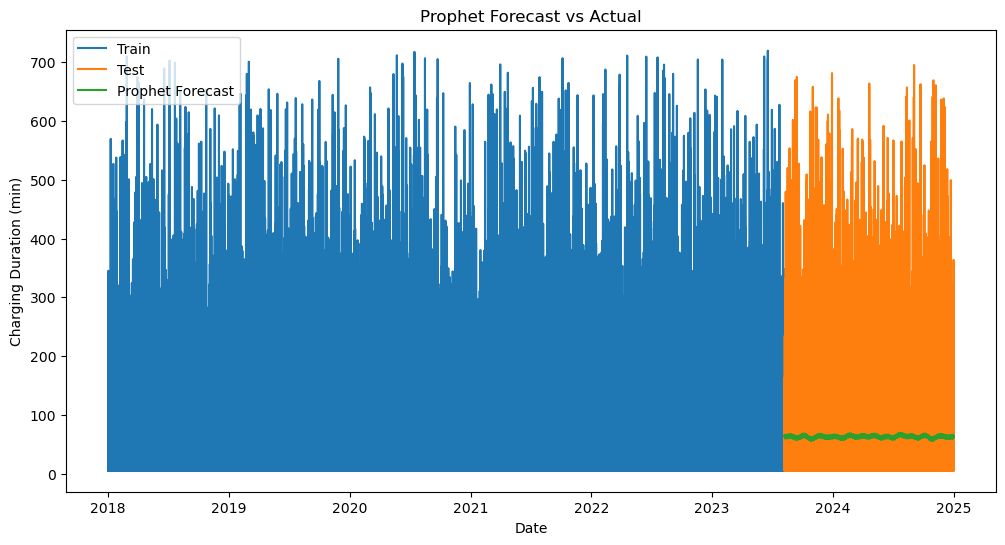

In [17]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(train_df['ds'], train_df['y'], label='Train')
plt.plot(test_df['ds'], test_df['y'], label='Test')
plt.plot(test_df['ds'], y_pred, label='Prophet Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Charging Duration (min)')
plt.title('Prophet Forecast vs Actual')
plt.show()

Your Prophet model results:

Test MSE: 7639.23
Test MAE: 62.11
Test R2 Score: -0.00
Interpretation:

The R² score is close to zero (or negative), which means Prophet is not able to explain the variance in your test data.
The error values (MSE and MAE) are high, similar to your ARIMA results.
Why is this happening?

Prophet, like ARIMA, is a univariate model by default. It only uses the date and the target (charging_duration_min), ignoring all your other features in X_train and X_test.
Your problem depends on many features (battery, weather, charger type, etc.), so univariate models cannot capture the complexity.
What should you do?

Use models that can include exogenous features, such as SARIMAX (with exog) or machine learning regressors (Random Forest, XGBoost, etc.).
Prophet can use extra features as "regressors," but you must add them explicitly.
If you want Prophet with exogenous features:
Let me know which columns from X_train/X_test you want to use, and I will provide the code for Prophet with regressors.